This is a notebook for a Date A Scientist portfolio project from Codecademy.


DATA: Profile information for users of OK cupid
ASSESSMENT: What are some predictive relationships between variables?
QUESTION: Is there a predictive relationship between length of answers to questions and income? If so, can OK Cupid assume a certain type of income based on how much the user types in their profile?




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [79]:
#EDA first
profiles = pd.read_csv('profiles.csv')
print(profiles.columns)


di1 = {'single': 0, 'available': 1, 'seeing someone': 2, 'married': 3, 'unknown': 4}
profiles['status'] = profiles['status'].map(di1)


profiles['essay0'] = profiles['essay0'].astype(str)

profiles.income = profiles.income.replace(-1, 0)
print(profiles.income.mean())

profiles['is_broke'] = np.where(profiles['income'] == 0, 1, 0)
print(profiles.is_broke.head())

profiles['is_rich'] = np.where(profiles['income'] > 50000, 2, 0)
print(profiles.is_rich.head())

profiles['incomescale'] = profiles['is_broke'] + profiles['is_rich']

print(profiles.incomescale.head())



Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
20034.030627564807
0    1
1    0
2    1
3    0
4    1
Name: is_broke, dtype: int64
0    0
1    2
2    0
3    0
4    0
Name: is_rich, dtype: int64
0    1
1    2
2    1
3    0
4    1
Name: incomescale, dtype: int64


OK so I think an ML solvable problem is determing how much a person says they make based on how much they write in the first essay question!!!

Income scale definition = {'1': makes $0 as reported, '0': makes between $0 and $50,000, '2': makes > $50000

In [80]:
profiles['essay0_length'] = profiles.apply(lambda tweet: len(tweet['essay0'].split()), axis=1)
print(profiles.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = profiles[['essay0_length', 'age']]
labels = profiles.incomescale
data = data.dropna()
labels = labels.dropna()



In [97]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state =1)

In [110]:
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(train_data, train_labels)
predictions = classifier.predict(test_data)
predictions = predictions.tolist()


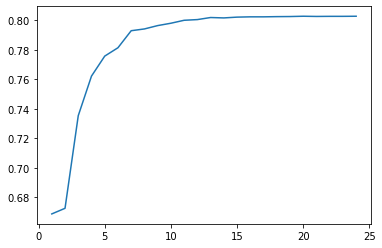

In [102]:
scores = []

for k in range(1, 25):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
    
plt.plot(range(1, 25), scores)
plt.show()

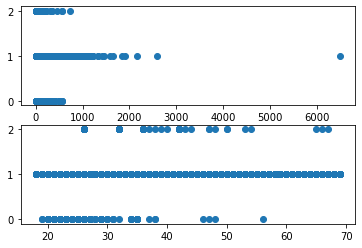

In [115]:
plt.subplot(2,1,1)
plt.scatter(test_data.essay0_length, predictions)
plt.subplot(2,1,2)
plt.scatter(test_data.age, predictions)

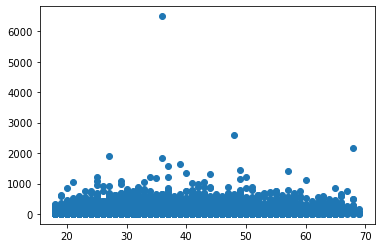

In [116]:
plt.scatter(test_data.age, test_data.essay0_length)


There is no real relationship between how long a essay response you write and your age, however, there is predictive power in the age and essay lenght on the reported income of the individual. 

Income is an important attribute according to those who use the dating app. Based on twitter.
However, I assumed that the -1 in the data set was a non -answer and that people who didn't want to answer were likely not making any money. Maybe the majority of them are college students or something. 

